In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

## AA-test

In [2]:
def aa_test_simulator(sample_size, significance_level, simul_count=100000):
    type_1_error_cnt = 0    
    mu = 2.1
    std = 1.3
    type_1_error_example = []
    
    for i in range(simul_count):
        sample_size_dev_A = np.random.randint(1, int(sample_size * 0.1))
        sample_size_dev_B = np.random.randint(1, int(sample_size * 0.1))

        A = np.random.normal(mu, std, sample_size + sample_size_dev_A)
        B = np.random.normal(mu, std, sample_size + sample_size_dev_B)

        t, p = stats.ttest_ind(A, B)

        if p < significance_level:
            type_1_error_cnt += 1
            type_1_error_example = (A, B)
        
        if (i+1) % 10000 == 0:
            print(f"Simulate {i+1} times...")

    print(f"{100 * type_1_error_cnt / simul_count: .2f}% ({type_1_error_cnt} / {simul_count})")
    return type_1_error_example

Simulate 10000 times...
Simulate 20000 times...
Simulate 30000 times...
Simulate 40000 times...
Simulate 50000 times...
Simulate 60000 times...
Simulate 70000 times...
Simulate 80000 times...
Simulate 90000 times...
Simulate 100000 times...
 1.05% (1054 / 100000)


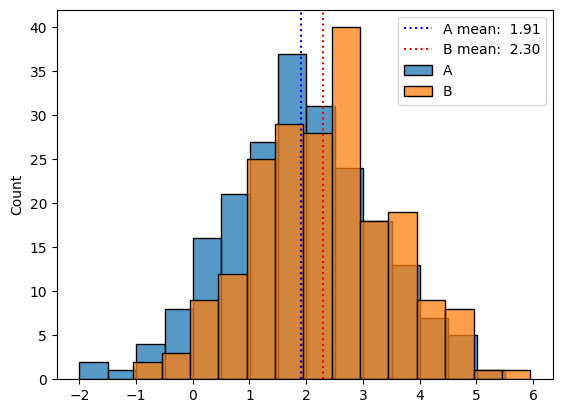

In [3]:
type_1_error_example = aa_test_simulator(sample_size=200, significance_level=0.01)
sns.histplot(type_1_error_example[0], binwidth=0.5,label='A')
sns.histplot(type_1_error_example[1], binwidth=0.5, label='B')

A_mean = np.mean(type_1_error_example[0])
B_mean = np.mean(type_1_error_example[1])
plt.axvline(x=A_mean, color='b', linestyle=':', label=f"A mean: {A_mean: .2f}")
plt.axvline(x=B_mean, color='r', linestyle=':', label=f"B mean: {B_mean: .2f}")
plt.legend()
plt.show()

Simulate 10000 times...
Simulate 20000 times...
Simulate 30000 times...
Simulate 40000 times...
Simulate 50000 times...
Simulate 60000 times...
Simulate 70000 times...
Simulate 80000 times...
Simulate 90000 times...
Simulate 100000 times...
 0.99% (989 / 100000)


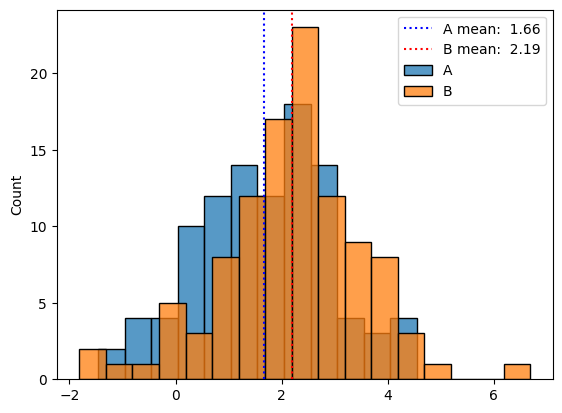

In [4]:
type_1_error_example = aa_test_simulator(sample_size=100, significance_level=0.01)
sns.histplot(type_1_error_example[0], binwidth=0.5,label='A')
sns.histplot(type_1_error_example[1], binwidth=0.5, label='B')

A_mean = np.mean(type_1_error_example[0])
B_mean = np.mean(type_1_error_example[1])
plt.axvline(x=A_mean, color='b', linestyle=':', label=f"A mean: {A_mean: .2f}")
plt.axvline(x=B_mean, color='r', linestyle=':', label=f"B mean: {B_mean: .2f}")
plt.legend()
plt.show()

Simulate 10000 times...
Simulate 20000 times...
Simulate 30000 times...
Simulate 40000 times...
Simulate 50000 times...
Simulate 60000 times...
Simulate 70000 times...
Simulate 80000 times...
Simulate 90000 times...
Simulate 100000 times...
 0.09% (92 / 100000)


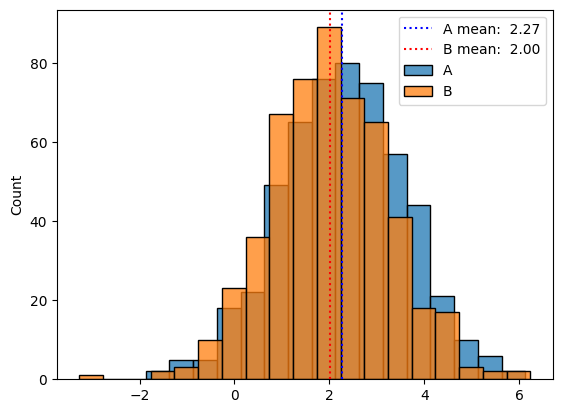

In [5]:
type_1_error_example = aa_test_simulator(sample_size=500, significance_level=0.001)
sns.histplot(type_1_error_example[0], binwidth=0.5,label='A')
sns.histplot(type_1_error_example[1], binwidth=0.5, label='B')

A_mean = np.mean(type_1_error_example[0])
B_mean = np.mean(type_1_error_example[1])
plt.axvline(x=A_mean, color='b', linestyle=':', label=f"A mean: {A_mean: .2f}")
plt.axvline(x=B_mean, color='r', linestyle=':', label=f"B mean: {B_mean: .2f}")
plt.legend()
plt.show()

- 두 집단이 같은 집단이더라도 NHST를 하면 다르다는 오류를 범할 수도 있다. (1종 오류)
- 이 1종 오류를 정하는 수준이 바로 유의 수준 (Significance Level)
- **p value와 유의 수준**: 
    * 귀무가설(Null Hypothesis)이 참이라고 가정할 때, **통계값(A, B 분포를 통해 계산한 T statistics)**보다 더 극단적인 값이 나올 확률
    * 이 확률이 작으면 작을수록, **통계값**이 이미 꽤 극단적인 값이다.
    * **통계값**이 극단적이라는 이유로 귀무가설을 기각해버렸을 때, 알고보니 귀무가설이 참인 경우가 바로 <u>**1종 오류**</u>
    * 이 때 이 <u>**1종 오류**</u>를 범할 확률을 미리 정해놓는 것이 <u>**유의 수준**</u>
        - 이 유의수준 아래로 p value가 나와서, 1종 오류를 범한다면 very unlucky인 것으로 킹정한다.